# ErrorChannelV0

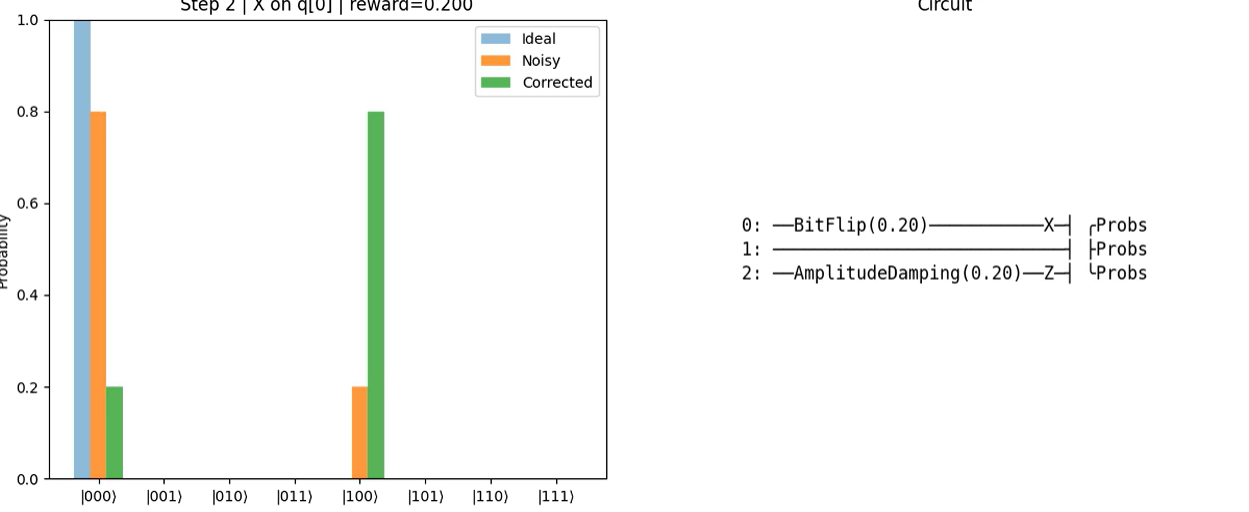

## Description

The **ErrorChannelV0** environment simulates a **multi-qubit noisy quantum system** where different qubits
may be subject to error channels (bitflip errors) with varying probabilities. It is based on the `QuantumEnv` base class. 
The agent's task is to identify and apply corrective single-qubit gates to mitigate the effects of these noise processes and restore the system state
to the computational basis state **|0...0⟩**.

This environment models the challenge of **quantum error mitigation/correction** in the presence of **Bit-flip errors**.

The agent interacts by applying X gate to specific qubits. Rewards are based
on the probability that the corrected quantum state has returned to the target basis state.

The environment includes a rendering mode that provides a **bar plot animation** comparing the noisy,
corrected, and ideal probability distributions, along with the evolving circuit diagram.


## Action Space

The action space is a **Discrete( [n_qubits] )** space, meaning the agent chooses:

1. A **target qubit**: index in `[0, n_qubits-1]` to apply the PauliX correction on.

Example (for 3 qubits):  
- `0` → Apply `X` gate on qubit 0  
- `2` → Apply `X` gate on qubit 2  


## Observation Space

The observation is a probability distribution over all computational basis states
of the `n_qubits` system:

obs $\in [0, 1]^{2^{n_{qubits}}}$

with the constraint:

$\sum_{i} obs_i = 1$

For example, with 3 qubits, the observation is a length-8 vector:

| Index | Basis State | Probability |
|-------|-------------|-------------|
| 0     |  \|000>       | [0, 1]      |
| 1     |  \|001>       | [0, 1]      |
| ...   |  ...          | ...         |
| 7     |  \|111>       | [0, 1]      |


## Rewards

The reward is the mean squared error between the target state and the corrected state multiplied by -1:

reward = -MSE(|0...0⟩, |corrected_state⟩)

- Maximum reward = 0.0 (perfect correction).  
- Minimum reward = -(2/2**num_qubits) (highly corrupted).

## Starting State

At the start of each episode:
- A set of **faulty qubits** is defined to apply bit flip errors with varying probabilities.  
(If not specified, a random qubit is chosen.)
- The agent begins with no corrections applied.

The first observation is the noisy probability distribution before any corrections.


## Episode End

The episode ends if one of the following occurs:

1. **Termination**:  
The obtained reward is 0.0.
2. **Truncation**:  
The system reaches the maximum number of steps (`max_steps`, default=10)

## Rendering

The rendering shows a **side-by-side animation** with:

1. **Left panel**: Bar chart of probabilities for each basis state:  
- Gray = Ideal noiseless target (|0...0⟩)  
- Orange = Noisy distribution  
- Blue = Corrected distribution  

The chart title updates with **step number, chosen correction, and reward**.

2. **Right panel**: A dynamically drawn ASCII-style **quantum circuit** reflecting
the applied corrections.

The animation can be displayed interactively or saved as an MP4 file.


## Arguments

- **`n_qubits`** (`int`, default=3): Number of qubits in the system.  
- **`faulty_qubits`** (`dict`, optional): Mapping of faulty qubit indices to their noise probabilities.  
- **`max_steps`** (`int`, default=10): Maximum number of agent actions per episode.  
- **`seed`** (`int`, optional): Random seed for reproducibility.  
- **`ffmpeg`** (`bool`, default=False): If `True`, uses FFmpeg for saving animations; otherwise uses Pillow (GIF).

In [1]:
from qrl.env import ErrorChannelV0

# set ffmpeg=True if you have ffmpeg installed to save as mp4, or ffmpeg=False to save as gif
env = ErrorChannelV0(
    n_qubits=3,
    faulty_qubits={0: 1.0, 2: 1.0},
    max_steps=6,
    seed=42,
    ffmpeg=False
)
obs = env.reset()
done = False
while not done:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print(f"step={len(env.corrections)} act={action} "
            f"reward={reward:.3f} errors={info['faulty_qubits']}")
env.render(save_path_without_extension="error_channelV0", interval_ms=700)


step=1 act=[1] reward=-0.250 errors={0: 1.0, 2: 1.0}
step=2 act=[2] reward=-0.250 errors={0: 1.0, 2: 1.0}
step=3 act=[2] reward=-0.250 errors={0: 1.0, 2: 1.0}
step=4 act=[1] reward=-0.250 errors={0: 1.0, 2: 1.0}
step=5 act=[1] reward=-0.250 errors={0: 1.0, 2: 1.0}
step=6 act=[2] reward=-0.250 errors={0: 1.0, 2: 1.0}
